In this Data Science Project we will create a Linear Regression model and a Decision Tree Regression Model to Predict **Apple’s Stock Price** using Machine Learning.

We can download the data from [here](https://in.search.yahoo.com/?fr2=inr)

In [11]:
import pandas as pd
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [12]:
# To get the number of training days:

print("trainging days =",apple.shape)

trainging days = (2518, 6)


In [15]:
apple.rename({' Close/Last':"Close Price"}, axis = 1,inplace = True)

In [23]:
apple["Close Price"] = apple["Close Price"].str.strip().str.strip("$").astype(float)

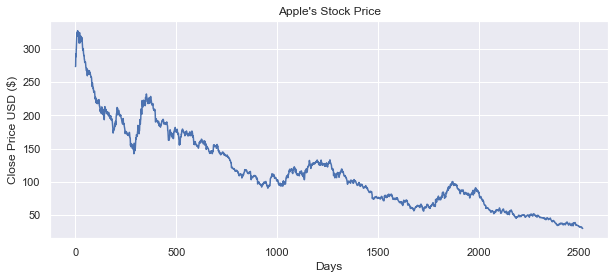

In [25]:
# To Visualize the close price Data:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close Price"])

plt.show()

In [17]:
# To get the close price:

apple = apple[["Close Price"]]
apple.head()

,Close Price
0,$273.36
1,$273.52
2,$292.65
3,$288.08
4,$298.18


In [27]:
# Creating a variable to predict ‘X’ days in the future:

futureDays = 25

#Create a new target column shifted ‘X’ units/days up:
apple["Prediction"] = apple[["Close Price"]].shift(-futureDays)

print(apple.head())
print()
print(apple.tail())

   Close Price  Prediction
0       273.36      319.23
1       273.52      317.70
2       292.65      316.57
3       288.08      318.73
4       298.18      315.24

      Close Price  Prediction
2513      31.2786         NaN
2514      30.1014         NaN
2515      29.9043         NaN
2516      29.8357         NaN
2517      29.8557         NaN


In [28]:
# To create a feature dataset (x) and convert into a numpy array and remove last ‘x’ rows/days:

import numpy as np
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
x

array([[273.36  ],
       [273.52  ],
       [292.65  ],
       ...,
       [ 34.2786],
       [ 34.3714],
       [ 34.22  ]])

In [29]:
# To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:

y = np.array(apple["Prediction"])[:-futureDays]
y

array([319.23  , 317.7   , 316.57  , ...,  29.9043,  29.8357,  29.8557])

In [30]:
# Split the data into 75% training and 25% testing

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

### Creating Models

In [31]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [33]:
# To get the last ‘x’ rows/days of the feature dataset:

xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
xfuture

array([[36.2843],
       [33.6943],
       [35.1786],
       [36.5693],
       [36.9543],
       [38.05  ],
       [37.2986],
       [38.3771],
       [37.3714],
       [37.4343],
       [38.5   ],
       [38.69  ],
       [38.0671],
       [37.0314],
       [34.9414],
       [35.2957],
       [35.3428],
       [35.56  ],
       [35.0986],
       [34.6328],
       [34.6128],
       [34.5414],
       [34.2786],
       [34.3714],
       [34.22  ]])

In [34]:
# To see the model tree prediction

treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [34.07   33.71   33.5714 33.6921 33.1986 32.9857 39.1214 32.7671 32.6228
 32.1071 35.4771 32.0928 32.0171 39.1534 37.0314 36.1928 32.2143 32.12
 35.0828 37.04   31.2786 30.1014 35.9843 29.8357 29.8557]


In [35]:
# To see the model linear regression prediction

linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [38.58198148 36.16294772 37.54926888 38.8481686  39.2077547  40.2311274
 39.52932741 40.53663548 39.59732187 39.65606983 40.65142284 40.82888091
 40.24709862 39.27976531 37.32772649 37.6586391  37.70263002 37.90549262
 37.47454969 37.03949721 37.02081741 36.95413054 36.708678   36.79535226
 36.65394619]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


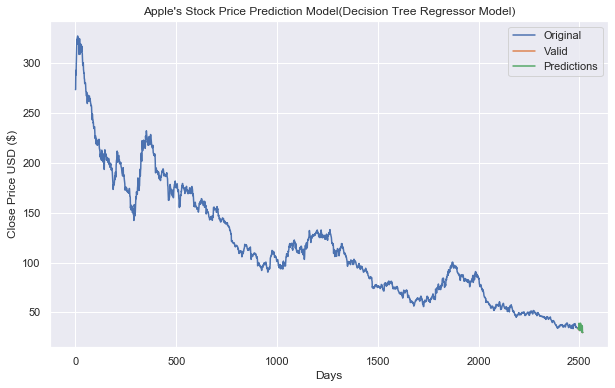

In [36]:
# Visualize decision tree predictions

predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close Price"])
plt.plot(valid[["Close Price", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


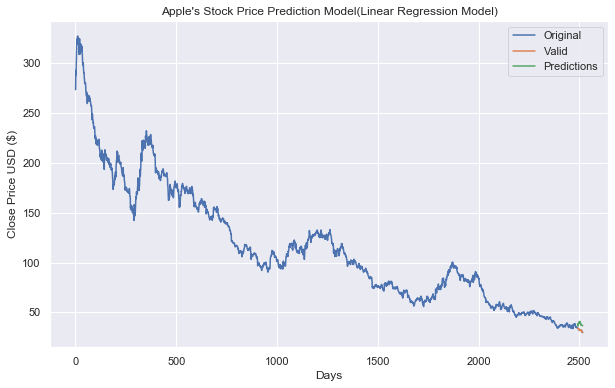

In [37]:
# Visualize the linear model predictions

predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close Price"])
plt.plot(valid[["Close Price", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()